In [1]:
#Libraries for pdf conversion
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
import re
from io import StringIO

#Libraries for feature extraction and topic modeling
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

#Other libraries
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text

In [4]:
Document=convert_pdf_to_txt('tsla-10k_20201231-gen.pdf')

In [6]:
# Document

In [7]:
f=open('Finance10k.txt','w')
f.write(Document)
f.close()
with open('Finance10k.txt') as f:
    clean_cont = f.read().splitlines()

In [8]:
clean_cont[1:15]

['',
 'UNITED\tSTATES',
 '',
 'Washington,\tD.C.\t20549',
 '',
 '(Mark\tOne)',
 '☒',
 '',
 'ANNUAL\tREPORT\tPURSUANT\tTO\tSECTION\t13\tOR\t15(d)\tOF\tTHE\tSECURITIES\tEXCHANGE\tACT\tOF\t1934',
 '',
 'FORM\t10-K',
 '',
 '\t',
 '']

In [11]:
doc=[i.replace('\xe2\x80\x9c','') for i in clean_cont ]
doc

['SECURITIES\tAND\tEXCHANGE\tCOMMISSION',
 '',
 'UNITED\tSTATES',
 '',
 'Washington,\tD.C.\t20549',
 '',
 '(Mark\tOne)',
 '☒',
 '',
 'ANNUAL\tREPORT\tPURSUANT\tTO\tSECTION\t13\tOR\t15(d)\tOF\tTHE\tSECURITIES\tEXCHANGE\tACT\tOF\t1934',
 '',
 'FORM\t10-K',
 '',
 '\t',
 '',
 '\t',
 '',
 '\t',
 '',
 '☐',
 '',
 '\t',
 '',
 '\t',
 '',
 '\t',
 '',
 'TRANSITION\tREPORT\tPURSUANT\tTO\tSECTION\t13\tOR\t15(d)\tOF\tTHE\tSECURITIES\tEXCHANGE\tACT\tOF\t1934',
 '',
 'OR',
 '',
 'For\tthe\ttransition\tperiod\tfrom\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tto\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t',
 '',
 'For\tthe\tfiscal\tyear\tended\tDecember\t31,\t2020\t',
 '',
 'Commission\tFile\tNumber:\t001-34756',
 '',
 'Tesla,\tInc.',
 '',
 '\t',
 '',
 '\t',
 '',
 '(Exact\tname\tof\tregistrant\tas\tspecified\tin\tits\tcharter)',
 '',
 'Delaware',
 '',
 '(State\tor\tother\tjurisdiction\tof',
 'incorporation\tor\torganization)',
 '',
 '\t',
 '',
 '3500\tDeer\tCreek\tRoad',
 'Palo\tAlto,\tCalifornia',
 '',


In [12]:
doc=[i.replace('\xe2\x80\x9d','') for i in doc ]
doc

['SECURITIES\tAND\tEXCHANGE\tCOMMISSION',
 '',
 'UNITED\tSTATES',
 '',
 'Washington,\tD.C.\t20549',
 '',
 '(Mark\tOne)',
 '☒',
 '',
 'ANNUAL\tREPORT\tPURSUANT\tTO\tSECTION\t13\tOR\t15(d)\tOF\tTHE\tSECURITIES\tEXCHANGE\tACT\tOF\t1934',
 '',
 'FORM\t10-K',
 '',
 '\t',
 '',
 '\t',
 '',
 '\t',
 '',
 '☐',
 '',
 '\t',
 '',
 '\t',
 '',
 '\t',
 '',
 'TRANSITION\tREPORT\tPURSUANT\tTO\tSECTION\t13\tOR\t15(d)\tOF\tTHE\tSECURITIES\tEXCHANGE\tACT\tOF\t1934',
 '',
 'OR',
 '',
 'For\tthe\ttransition\tperiod\tfrom\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tto\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t',
 '',
 'For\tthe\tfiscal\tyear\tended\tDecember\t31,\t2020\t',
 '',
 'Commission\tFile\tNumber:\t001-34756',
 '',
 'Tesla,\tInc.',
 '',
 '\t',
 '',
 '\t',
 '',
 '(Exact\tname\tof\tregistrant\tas\tspecified\tin\tits\tcharter)',
 '',
 'Delaware',
 '',
 '(State\tor\tother\tjurisdiction\tof',
 'incorporation\tor\torganization)',
 '',
 '\t',
 '',
 '3500\tDeer\tCreek\tRoad',
 'Palo\tAlto,\tCalifornia',
 '',


In [14]:
doc=[i.replace('\xe2\x80\x99s','') for i in doc ]
doc

docs = [x for x in doc if x != ' ']
docs

['SECURITIES\tAND\tEXCHANGE\tCOMMISSION',
 '',
 'UNITED\tSTATES',
 '',
 'Washington,\tD.C.\t20549',
 '',
 '(Mark\tOne)',
 '☒',
 '',
 'ANNUAL\tREPORT\tPURSUANT\tTO\tSECTION\t13\tOR\t15(d)\tOF\tTHE\tSECURITIES\tEXCHANGE\tACT\tOF\t1934',
 '',
 'FORM\t10-K',
 '',
 '\t',
 '',
 '\t',
 '',
 '\t',
 '',
 '☐',
 '',
 '\t',
 '',
 '\t',
 '',
 '\t',
 '',
 'TRANSITION\tREPORT\tPURSUANT\tTO\tSECTION\t13\tOR\t15(d)\tOF\tTHE\tSECURITIES\tEXCHANGE\tACT\tOF\t1934',
 '',
 'OR',
 '',
 'For\tthe\ttransition\tperiod\tfrom\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tto\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t',
 '',
 'For\tthe\tfiscal\tyear\tended\tDecember\t31,\t2020\t',
 '',
 'Commission\tFile\tNumber:\t001-34756',
 '',
 'Tesla,\tInc.',
 '',
 '\t',
 '',
 '\t',
 '',
 '(Exact\tname\tof\tregistrant\tas\tspecified\tin\tits\tcharter)',
 '',
 'Delaware',
 '',
 '(State\tor\tother\tjurisdiction\tof',
 'incorporation\tor\torganization)',
 '',
 '\t',
 '',
 '3500\tDeer\tCreek\tRoad',
 'Palo\tAlto,\tCalifornia',
 '',


In [15]:
docss = [x for x in docs if x != '']
docss

['SECURITIES\tAND\tEXCHANGE\tCOMMISSION',
 'UNITED\tSTATES',
 'Washington,\tD.C.\t20549',
 '(Mark\tOne)',
 '☒',
 'ANNUAL\tREPORT\tPURSUANT\tTO\tSECTION\t13\tOR\t15(d)\tOF\tTHE\tSECURITIES\tEXCHANGE\tACT\tOF\t1934',
 'FORM\t10-K',
 '\t',
 '\t',
 '\t',
 '☐',
 '\t',
 '\t',
 '\t',
 'TRANSITION\tREPORT\tPURSUANT\tTO\tSECTION\t13\tOR\t15(d)\tOF\tTHE\tSECURITIES\tEXCHANGE\tACT\tOF\t1934',
 'OR',
 'For\tthe\ttransition\tperiod\tfrom\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tto\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t',
 'For\tthe\tfiscal\tyear\tended\tDecember\t31,\t2020\t',
 'Commission\tFile\tNumber:\t001-34756',
 'Tesla,\tInc.',
 '\t',
 '\t',
 '(Exact\tname\tof\tregistrant\tas\tspecified\tin\tits\tcharter)',
 'Delaware',
 '(State\tor\tother\tjurisdiction\tof',
 'incorporation\tor\torganization)',
 '\t',
 '3500\tDeer\tCreek\tRoad',
 'Palo\tAlto,\tCalifornia',
 '(Address\tof\tprincipal\texecutive\toffices)',
 '\t',
 '\t',
 '\t',
 '\t',
 '\t',
 '91-2197729',
 '(I.R.S.\tEmployer',
 'Identif

In [16]:
financedoc=[re.sub("[^a-zA-Z]+", " ", s) for s in docss]

In [17]:
financedoc

['SECURITIES AND EXCHANGE COMMISSION',
 'UNITED STATES',
 'Washington D C ',
 ' Mark One ',
 ' ',
 'ANNUAL REPORT PURSUANT TO SECTION OR d OF THE SECURITIES EXCHANGE ACT OF ',
 'FORM K',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 'TRANSITION REPORT PURSUANT TO SECTION OR d OF THE SECURITIES EXCHANGE ACT OF ',
 'OR',
 'For the transition period from to ',
 'For the fiscal year ended December ',
 'Commission File Number ',
 'Tesla Inc ',
 ' ',
 ' ',
 ' Exact name of registrant as specified in its charter ',
 'Delaware',
 ' State or other jurisdiction of',
 'incorporation or organization ',
 ' ',
 ' Deer Creek Road',
 'Palo Alto California',
 ' Address of principal executive offices ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' I R S Employer',
 'Identification No ',
 ' ',
 ' ',
 ' Zip Code ',
 ' ',
 ' Registrant s telephone number including area code ',
 'Securities registered pursuant to Section b of the Act ',
 'Title of each class',
 'Common stock',
 'Trading Symbol s ',
 'TSLA',
 'Name o

In [18]:
vect=CountVectorizer(ngram_range=(1,1),stop_words='english')
fin=vect.fit_transform(financedoc)
pd.DataFrame(fin.toarray(),columns=vect.get_feature_names()).head(1)

,aa,aacquisition,ab,abandoned,abandonment,abatement,abatements,ability,abl,able,...,zealand,zep,zero,zev,zevs,zhengzhou,zip,zone,zoning,zy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
lda=LatentDirichletAllocation(n_components=5)
lda.fit_transform(fin)
lda_dtf=lda.fit_transform(fin)

In [20]:
sorting=np.argsort(lda.components_)[:,::-1]
features=np.array(vect.get_feature_names())

In [21]:
array=np.full((1, sorting.shape[1]), 1)
array = np.concatenate((array,sorting), axis=0)

In [22]:
import mglearn
topics = mglearn.tools.print_topics(topics=range(1,6), feature_names=features,
sorting=array, topics_per_chunk=5, n_words=10)

topic 1       topic 2       topic 3       topic 4       topic 5       
--------      --------      --------      --------      --------      
shall         december      energy        credit        agent         
revolving     stock         lease         shall         administrative
rate          tesla         vehicles      lender        shall         
loans         million       assets        company       time          
loan          llc           solar         agreement     collateral    
date          value         revenue       obligations   notes         
eligible      year          costs         borrower      section       
inventory     net           sales         party         borrowers     
borrowing     tax           storage       respect       notice        
borrower      income        vehicle       subsidiaries  agreement     




In [23]:
from __future__ import  print_function
import pyLDAvis
import pyLDAvis.sklearn

In [24]:
zit=pyLDAvis.sklearn.prepare(lda,fin,vect)

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
pyLDAvis.display(zit)

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
d = path.dirname(__name__)

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
text = open(path.join(d, 'Finance10k.txt')).read()

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color="black", max_words=2000, stopwords=stopwords)
wc.generate(text)

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


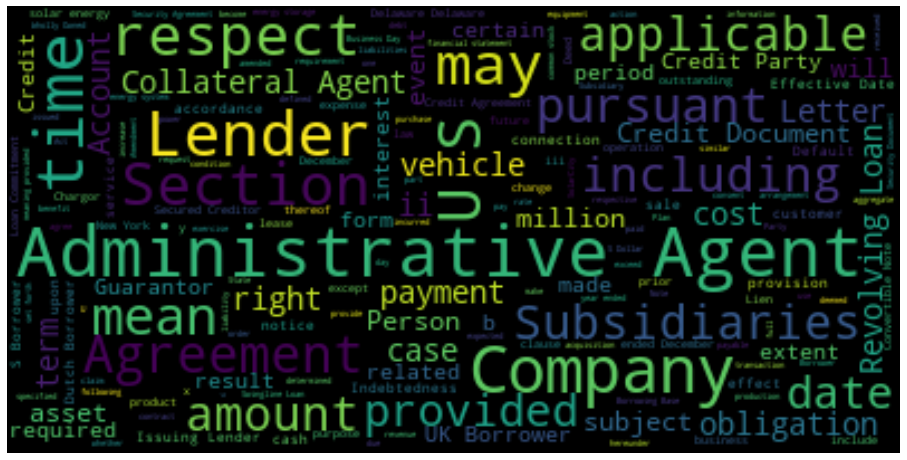

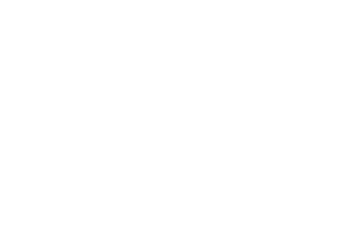

In [32]:
plt.figure(figsize=(16,13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()